# Extracting word features and show Exploratory Data Analysis (EDA) — Inspect, Visualize and Clean the Data

This Exploratory Data Analysis (EDA) is based on a public dataset of 2,225 news articles from the BBC.

The main goal is to build a system that can reliably sort previously unseen articles into one of five categories: business, entertainment, politics, sport, or tech.

The overall approach is informed by guides on [Google Cloud Blog: Problem Solving with ML - Automatic Document Classification](https://cloud.google.com/blog/products/ai-machine-learning/problem-solving-with-ml-automatic-document-classification).

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

## Basic Inspection - Head and Info

In [119]:
# first step of basic EDA
def print_head_info(df, df_name):
    print(f"Head of {df_name}:")
    print(df.head())
    print("\n")

    print(f"{df_name} Info:")
    df.info()
    print("-" * 55)


# check basic data input sanity
def check_missing_values(df, df_name):
    missing_count = df.isnull().sum()
    missing_count = missing_count[missing_count > 0]
    
    if missing_count.empty:
        print(f"No missing values found in any column in {df_name}.")
        print("-" * 55)
        return
    
    missing_percentage = (missing_count / len(df)) * 100
    missing_summary = pd.DataFrame({
        'Missing Count': missing_count,
        'Missing Percentage': missing_percentage.round(2).astype(str) + '%' 
    }).sort_values(by='Missing Count', ascending=False)
    
    print(missing_summary)
    print("-" * 55)
    

In [128]:
# Sample Solution
sample_df = pd.read_csv('learn-ai-bbc/BBC News Sample Solution.csv')

SAMPLE_NAME = 'Sample Solution'

print_head_info(sample_df, SAMPLE_NAME)
check_missing_values(sample_df, SAMPLE_NAME)


Head of Sample Solution:
   ArticleId       Category
0       1018          sport
1       1319           tech
2       1138       business
3        459  entertainment
4       1020       politics


Sample Solution Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 735 entries, 0 to 734
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ArticleId  735 non-null    int64 
 1   Category   735 non-null    object
dtypes: int64(1), object(1)
memory usage: 11.6+ KB
-------------------------------------------------------
No missing values found in any column in Sample Solution.
-------------------------------------------------------


In [129]:
# take a look at head and basic info
train_df = pd.read_csv('learn-ai-bbc/BBC News Train.csv')
test_df = pd.read_csv('learn-ai-bbc/BBC News Test.csv')

TRAIN_NAME = 'Train Data'
TEST_NAME = 'Test Data'

print_head_info(train_df, TRAIN_NAME)
print_head_info(test_df, TEST_NAME)

Head of Train Data:
   ArticleId                                               Text  Category
0       1833  worldcom ex-boss launches defence lawyers defe...  business
1        154  german business confidence slides german busin...  business
2       1101  bbc poll indicates economic gloom citizens in ...  business
3       1976  lifestyle  governs mobile choice  faster  bett...      tech
4        917  enron bosses in $168m payout eighteen former e...  business


Train Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1490 entries, 0 to 1489
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ArticleId  1490 non-null   int64 
 1   Text       1490 non-null   object
 2   Category   1490 non-null   object
dtypes: int64(1), object(2)
memory usage: 35.1+ KB
-------------------------------------------------------
Head of Test Data:
   ArticleId                                               Text
0       1018  qpr keeper d

## Check Missing Values

In [130]:
# check if all the values exist
check_missing_values(train_df, TRAIN_NAME)
check_missing_values(test_df, TEST_NAME)

No missing values found in any column in Train Data.
-------------------------------------------------------
No missing values found in any column in Test Data.
-------------------------------------------------------


## Compare Total Number of Articles

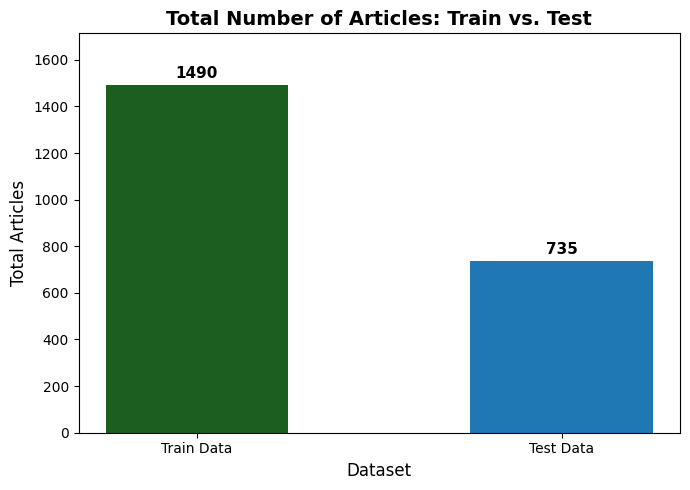

In [57]:
COLOR_TRAIN = '#1B5E20'  # dark green
COLOR_TEST = '#1f77b4'   # navy

BAR_WIDTH = 0.5 

data_sizes = {
    TRAIN_NAME: len(train_df),
    TEST_NAME: len(test_df)
}
dataset_names = list(data_sizes.keys())
article_counts = list(data_sizes.values())
bar_colors = [COLOR_TRAIN, COLOR_TEST]

# plot bar chart
plt.figure(figsize=(7, 5)) 
plt.style.use('default')
plt.bar(
    dataset_names, 
    article_counts, 
    color=bar_colors,
    width=BAR_WIDTH
)

plt.title('Total Number of Articles: Train vs. Test', fontsize=14, fontweight='bold')
plt.xlabel('Dataset', fontsize=12)
plt.ylabel('Total Articles', fontsize=12)
plt.ylim(0, max(article_counts) * 1.15) 

for i, count in enumerate(article_counts):
    plt.text(
        i, count + 30,
        str(count), 
        ha='center', 
        fontsize=11,
        fontweight='bold'
    )

plt.tight_layout()
plt.show()

## Category Distribution Analysis

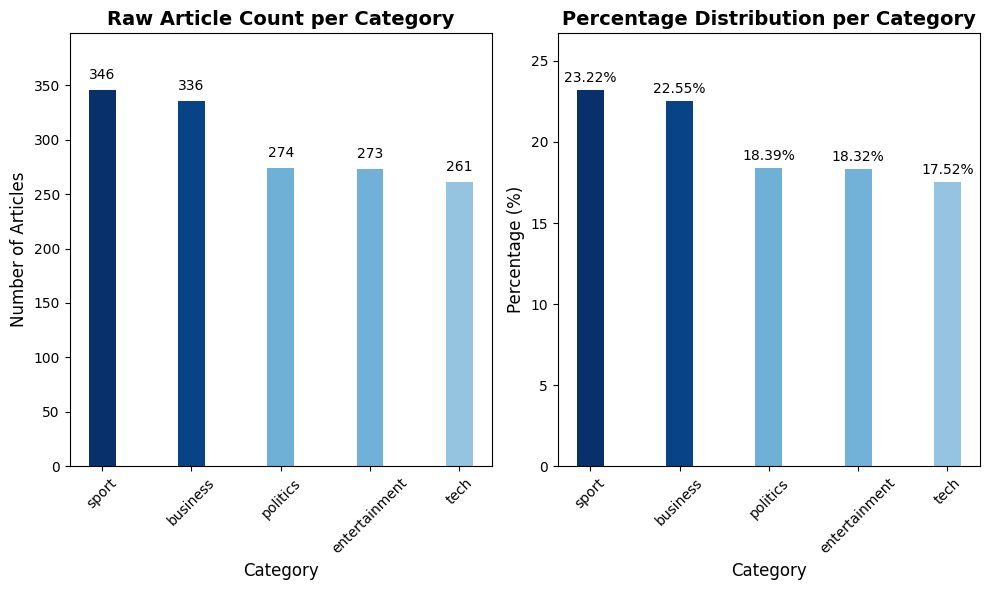

In [66]:
category_counts = train_df['Category'].value_counts()
category_percentages = (train_df['Category'].value_counts(normalize=True) * 100).round(2)
category_order = category_counts.index

cmap = plt.colormaps.get_cmap('Blues') 
CMAP_MIN_VALUE = 0.4

# color adjustment per bar length
def get_colors_adjusted(data_values, cmap, cmap_min):
    normalized = (data_values - data_values.min()) / (data_values.max() - data_values.min())
    scaled_normalized = normalized * (1.0 - cmap_min) + cmap_min
    return cmap(scaled_normalized)

colors_counts = get_colors_adjusted(category_counts.values, cmap, CMAP_MIN_VALUE)
colors_percentages = get_colors_adjusted(category_percentages.values, cmap, CMAP_MIN_VALUE)

# plot side by side
fig, axes = plt.subplots(1, 2, figsize=(10, 6)) 
plt.style.use('default') 


# raw article count
axes[0].bar(
    category_order, 
    category_counts.values, 
    color=colors_counts, 
    width=BAR_WIDTH
)

axes[0].set_title('Raw Article Count per Category', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Number of Articles', fontsize=12)
axes[0].set_xlabel('Category', fontsize=12)
axes[0].tick_params(axis='x', rotation=45) 
axes[0].set_ylim(0, category_counts.max() * 1.15) 

for i, count in enumerate(category_counts.values):
    axes[0].text(
        i, count + 10, 
        str(count), 
        ha='center', 
        fontsize=10
    )


# percentage per category
axes[1].bar(
    category_order, 
    category_percentages.values, 
    color=colors_percentages, 
    width=BAR_WIDTH
)

axes[1].set_title('Percentage Distribution per Category', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Percentage (%)', fontsize=12)
axes[1].set_xlabel('Category', fontsize=12)
axes[1].tick_params(axis='x', rotation=45)
axes[1].set_ylim(0, category_percentages.max() * 1.15) 

for i, percentage in enumerate(category_percentages.values):
    axes[1].text(
        i, percentage + 0.5, 
        f'{percentage}%', 
        ha='center', 
        fontsize=10
    )

plt.tight_layout()
plt.show()

## Word Count Analysis

In [72]:
# count number of words
train_df['word_count'] = train_df['Text'].apply(lambda x: len(str(x).split()))

word_stats = train_df['word_count'].describe().to_dict()

print("\nArticle Word Count Statistics:")
print("-" * 55)
print(f"Total Articles (count): {int(word_stats['count']):,}")
print(f"Mean (Average) Length:  {word_stats['mean']:.2f} words")
print(f"Median (50th Pctl):     {word_stats['50%']:.0f} words")
print(f"Standard Deviation:     {word_stats['std']:.2f}")
print(f"Minimum Length:         {word_stats['min']:.0f} words")
print(f"Maximum Length:         {word_stats['max']:.0f} words")
print("-" * 55)

display_df = train_df.head().copy()
display_df['Text_Snippet'] = display_df['Text'].apply(lambda x: str(x)[:80] + '...') # truncate the endless texts

print("\nTrain Data Head with Word Count:")
print(display_df[['ArticleId', 'Category', 'word_count', 'Text_Snippet']].to_markdown(index=False))


Article Word Count Statistics:
-------------------------------------------------------
Total Articles (count): 1,490
Mean (Average) Length:  385.01 words
Median (50th Pctl):     337 words
Standard Deviation:     210.90
Minimum Length:         90 words
Maximum Length:         3345 words
-------------------------------------------------------

Train Data Head with Word Count:
|   ArticleId | Category   |   word_count | Text_Snippet                                                                        |
|------------:|:-----------|-------------:|:------------------------------------------------------------------------------------|
|        1833 | business   |          301 | worldcom ex-boss launches defence lawyers defending former worldcom chief bernie... |
|         154 | business   |          325 | german business confidence slides german business confidence fell in february kn... |
|        1101 | business   |          514 | bbc poll indicates economic gloom citizens in a majority o

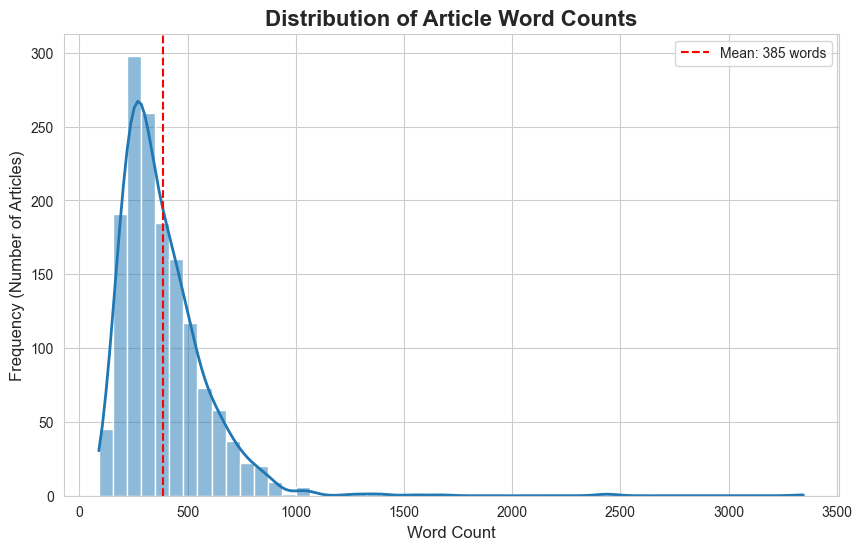

In [84]:
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))

# plot 
sns.histplot(
    data=train_df, 
    x='word_count', 
    bins=50,
    kde=True,
    color='#1f77b4',
    line_kws={'linewidth': 2, 'color': '#ff7f0e'}
)

plt.title('Distribution of Article Word Counts', fontsize=16, fontweight='bold')
plt.xlabel('Word Count', fontsize=12)
plt.ylabel('Frequency (Number of Articles)', fontsize=12)
mean_count = train_df['word_count'].mean()
plt.axvline(mean_count, color='r', linestyle='--', linewidth=1.5, label=f'Mean: {mean_count:.0f} words')
plt.legend()

plt.show()

### 1. TF-IDF Vectorization: Processing Raw Text to Matrix Form

The **TF-IDF (Term Frequency-Inverse Document Frequency)** method transforms unstructured text into a numerical feature matrix. This is necessary because machine learning models require numerical input.

#### How It Works
TF-IDF assigns a weight to every word (or term) in a document, evaluating its importance within that document relative to the entire set of articles (the corpus).

* **Term Frequency (TF):** Measures how often a term appears in a specific document.
* **Inverse Document Frequency (IDF):** Measures the rarity of a term across all documents.
* **Final Score (TF-IDF):** The score is high only if a word appears frequently in a specific article but rarely across the corpus.

#### Implementation
Below utilizes the *TfidfVectorizer* with the following key settings:

* **stop_words='english'**: Removes common, low-value words (e.g., 'the', 'is') that add noise but barely no predictive power.
* **max_features=10000**: Limits the resulting feature vector size to the top 10,000 most informative terms. This improves model training efficiency without significant loss of information.
* **ngram_range=(1, 2)**: Generates features using both single words (unigrams) and two-word sequences (bigrams). This adds contextual richness (e.g., treating "stock market" as one feature) which is often more discriminative than unigrams alone.

The resulting matrix shape is **(1490 articles, 10000 features)**.

In [100]:
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import TfidfVectorizer

N_COMPONENTS = 2
RANDOM_STATE = 42
N_SAMPLES = 800
MAX_FEATURES = 10000

# TF-IDF vectorization with bigrams
vectorizer = TfidfVectorizer(
    stop_words='english',      
    max_features=MAX_FEATURES,
    ngram_range=(1, 2)
)

corpus = train_df['Text'].tolist()
tfidf_matrix = vectorizer.fit_transform(corpus)
feature_names = np.array(vectorizer.get_feature_names_out())

print(f"Matrix Shape: {tfidf_matrix.shape}")

Matrix Shape: (1490, 10000)


### 2. t-SNE: Visualizing High-Dimensional Feature Space

After creating the 10,000-dimensional TF-IDF feature space, we need a method to inspect how well the features separate the categories. For that, **t-SNE (t-distributed Stochastic Neighbor Embedding)** for this dimensionality reduction is used.

#### How It Works
t-SNE is a non-linear algorithm used primarily for visualization. It takes the high-dimensional vectors and maps them to a lower-dimensional space (here, 2D) while striving to preserve the local structure.

This means that articles that were numerically close in the 10,000-dimensional TF-IDF space are kept visually close on the 2D plot.

#### Interpretation
The t-SNE plot reveals strong separability:
* **Distinct Clusters:** Articles largely form **tight, distinct clusters** based on their category (e.g., 'sport' in red, 'politics' in navy). This confirms that the TF-IDF features successfully capture the unique vocabulary of each news topic.
* **Minor Overlap:** There is minor, expected overlap, particularly between categories like 'business' and 'politics'. This suggests that some articles share common topics or terminology (like articles on economic policy). These overlapping points represent the most ambiguous articles that a classification model might struggle with.

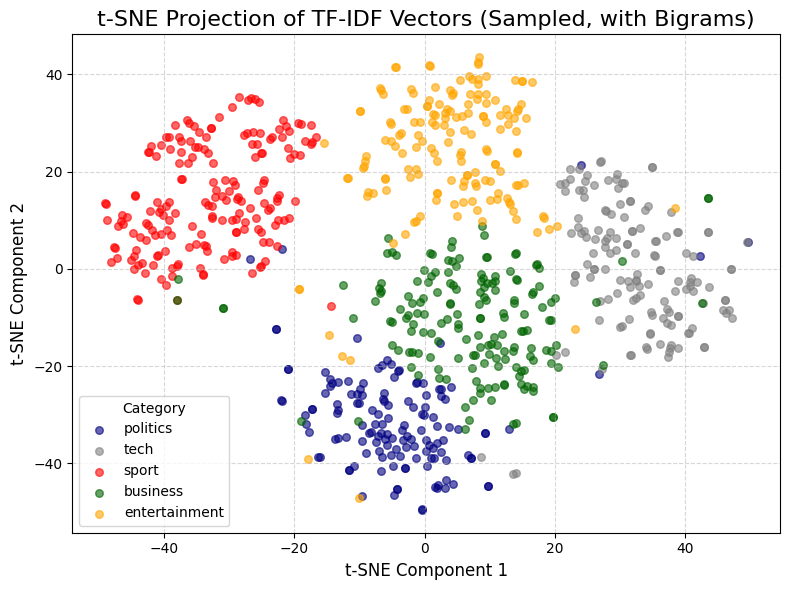

In [101]:
# sample to avoid disaster
sample_indices = np.random.choice(tfidf_matrix.shape[0], N_SAMPLES, replace=False)

tfidf_sample = tfidf_matrix[sample_indices, :]
category_sample = train_df['Category'].iloc[sample_indices]

# apply t-SNE
tsne = TSNE(
    n_components=N_COMPONENTS, 
    init='pca',
    random_state=RANDOM_STATE,
    learning_rate='auto'
)

tsne_results = tsne.fit_transform(tfidf_sample.toarray())

# plot
plt.figure(figsize=(8, 6))

color_map = {
    'business': 'darkgreen',
    'entertainment': 'orange',
    'politics': 'navy',
    'sport': 'red',
    'tech': 'grey'
}
category_labels = category_sample.to_numpy()

for category in category_sample.unique():
    mask = (category_labels == category)
    
    plt.scatter(
        tsne_results[mask, 0],
        tsne_results[mask, 1],
        label=category,
        color=color_map.get(category),
        alpha=0.6,
        s=30
    )

plt.title('t-SNE Projection of TF-IDF Vectors (Sampled, with Bigrams)', fontsize=16)
plt.xlabel('t-SNE Component 1', fontsize=12)
plt.ylabel('t-SNE Component 2', fontsize=12)
plt.legend(title='Category')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

## Comparative Feature Analysis

### 1. Analysis Purpose

Created a grid of bar charts to visually confirm that the high **TF-IDF scores** were linked to logical, category specific words. This validates the feature engineering before building the model.

### 2. Interpretation of Features

* **Category-Specific Plots** (first 5 Plots):
    * **Result:** These show highly specialized vocabulary. For example, the top words for 'sport' are terms like 'game' and 'win', while 'business' is dominated by 'growth' and 'market'.
    * **Insight:** The features are pure and discriminative, meaning our model will have a clear path to classify most articles.
* **Global Summary Plot** (the last red Plot):
    * **Result:** This shows the absolute top 10 features across the entire dataset (e.g., 'said', 'mr', 'year').
    * **Insight:** These words confirm the general style of the corpus (formal news reporting). While high-ranking, their scores are much lower than category-specific words (like 'film' or 'election'), proving that TF-IDF successfully suppressed their importance relative to the topic words.


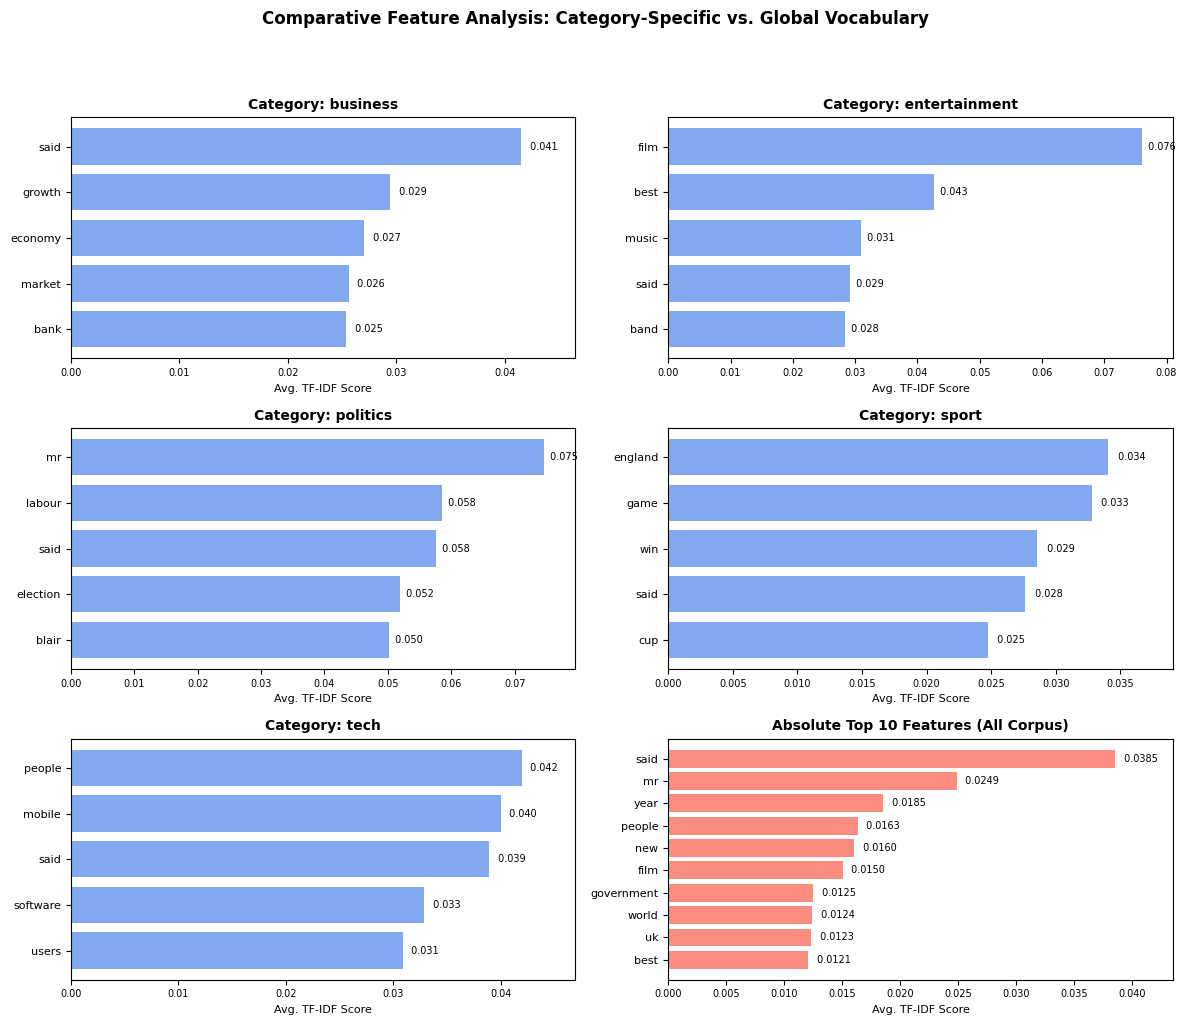

In [138]:
N_TOP_FEATURES_VISUAL = 5
N_TOP_ABSOLUTE_FEATURES = 10
LIGHT_BLUE = '#6495ED'      
LIGHT_RED = '#FA8072'       
OPACITY = 0.8               
N_COLS = 2                  
N_ROWS = 3                  
X_AXIS_PADDING = 0.005
PLOT_COLOR_CAT = LIGHT_BLUE
PLOT_COLOR_SUMMARY = LIGHT_RED

# calculate top features based on average tf-idf score
def calculate_top_features(category, df, matrix, names, n_features, is_summary=False):
    if is_summary:
        avg_scores = matrix.mean(axis=0).A1
    else:
        category_indices = df[df['Category'] == category].index
        category_vectors = matrix[category_indices.values, :]
        avg_scores = category_vectors.mean(axis=0).A1
    
    top_indices = avg_scores.argsort()[-n_features:]    
    top_scores = avg_scores[top_indices][::-1]
    top_features = names[top_indices][::-1]
    
    return top_features, top_scores


# plot bar chart
def plot_bar_chart(ax, features, scores, title, color, alpha, is_summary=False):
    scores_plot = np.array(scores)
    features_plot = features
    
    features_plot = features_plot[::-1]
    scores_plot = scores_plot[::-1]
    
    ax.barh(features_plot, scores_plot, color=color, alpha=alpha)    
    ax.set_title(title, fontsize=10, fontweight='bold')
    ax.set_xlabel('Avg. TF-IDF Score', fontsize=8)
    
    max_score = max(scores_plot) if scores_plot.size > 0 else 0
    ax.set_xlim(right=max_score + X_AXIS_PADDING)
    
    text_format_template = " {:.4f}" if is_summary else " {:.3f}"    
    for index, value in enumerate(scores_plot):
        
        # Cast value to standard float and use the format template
        formatted_label = text_format_template.format(float(value))

        ax.text(
            float(value) + 0.0005, 
            index, 
            formatted_label, 
            va='center', 
            fontsize=7
        )
    
    ax.tick_params(axis='y', labelsize=8)
    ax.tick_params(axis='x', labelsize=7)



# set up plot grid
fig, axes = plt.subplots(N_ROWS, N_COLS, figsize=(12, 10)) 
plt.style.use('default')
axes = axes.flatten()
all_categories = sorted(train_df['Category'].unique())

# plot 5 categories
for i, category in enumerate(all_categories):
    top_features, top_scores = calculate_top_features(
        category, train_df, tfidf_matrix, feature_names, N_TOP_FEATURES_VISUAL, is_summary=False
    )
    
    plot_bar_chart(
        axes[i], top_features, top_scores,
        f'Category: {category}', PLOT_COLOR_CAT, OPACITY
    )


# plot absolute top features
top_abs_features, top_abs_scores = calculate_top_features(
    None, train_df, tfidf_matrix, feature_names, N_TOP_ABSOLUTE_FEATURES, is_summary=True
)

plot_bar_chart(
    axes[5], top_abs_features, top_abs_scores,
    f'Absolute Top {N_TOP_ABSOLUTE_FEATURES} Features (All Corpus)', PLOT_COLOR_SUMMARY, 0.9, is_summary=True
)


fig.suptitle('Comparative Feature Analysis: Category-Specific vs. Global Vocabulary', fontsize=12, fontweight='bold', y=1.02)
plt.tight_layout(rect=[0, 0, 1, 0.98]) 
plt.show()

## References

This EDA follows the suggestions from [Google Cloud Blog: Problem Solving with ML - Automatic Document Classification](https://cloud.google.com/blog/products/ai-machine-learning/problem-solving-with-ml-automatic-document-classification), which is introduced in [Kaggle Competition: BBC News Classification Overview](https://www.kaggle.com/competitions/learn-ai-bbc/overview)

# Building and training models

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.decomposition import NMF
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
train_df = pd.read_csv('learn-ai-bbc/BBC News Train.csv')
test_df = pd.read_csv('learn-ai-bbc/BBC News Test.csv')

MAX_FEATURES = 15000 # initially was 10000 but increased to improve accuracy
RANDOM_STATE = 42

## Should you include texts from the test dataset in the input matrix?
Yes. Because matrix factorization (NMF) is an unsupervised technique, it learns the underlying topics based on the shared words.

By including the test data,
- I can ensure the model learns the full vocabulary(features) present in both sets.
- I can ensure both train and test data are mapped to the same topic space.
- No label leakage occurs because we don't use the category column during the factorization process, only the raw text.

In [3]:
print("--- Feature Extraction Result ---")
vectorizer = TfidfVectorizer(
    stop_words='english',      
    max_features=MAX_FEATURES,
    ngram_range=(1, 2),
    sublinear_tf=True,  # sublinear_tf=True (Log scaling)
    min_df=3,           # ignore rare words
    max_df=0.9          # ignore corpus-only stop words
)

# ---> learn from both train and test <---
all_text = pd.concat([train_df['Text'], test_df['Text']])
vectorizer.fit(all_text)

X_train_all = vectorizer.transform(train_df['Text'])
y_encoded = LabelEncoder().fit_transform(train_df['Category'])

# generate local split
X_train, X_val, y_train, y_val = train_test_split(
    X_train_all, y_encoded, test_size=0.2, random_state=RANDOM_STATE, stratify=y_encoded
)

print(f"Data Split: Train={X_train.shape[0]}, Val={X_val.shape[0]} documents")


--- Feature Extraction Result ---
Data Split: Train=1192, Val=298 documents


## Modelling and Tuning
- Tuning k: will iterate through k=5 to 25.

In [4]:
k_values = [5, 10, 15, 20, 25]
nmf_results = []
best_nmf_acc = 0
best_nmf_model = None
best_nmf_mapping = None
best_nmf_preds = None

# check for different k values
for k in k_values:
    # train NMF
    nmf = NMF(
        n_components=k, random_state=RANDOM_STATE, max_iter=1000, 
        init='nndsvda', solver='mu', beta_loss='kullback-leibler'
    )
    
    W_train = nmf.fit_transform(X_train)
    
    # map topic to category
    train_topics = np.argmax(W_train, axis=1)
    cm = confusion_matrix(y_train, train_topics)
    topic_mapping = np.argmax(cm, axis=0) # Map topic to most frequent category
    
    # evaluate
    W_val = nmf.transform(X_val)
    val_topics = np.argmax(W_val, axis=1)
    val_preds = topic_mapping[val_topics]
    
    acc = accuracy_score(y_val, val_preds)    
    nmf_results.append({'k': k, 'Validation Accuracy': acc})
    
    if acc > best_nmf_acc:
        best_nmf_acc = acc
        best_nmf_model = nmf
        best_nmf_mapping = topic_mapping
        best_nmf_preds = val_preds # Save for confusion matrix

results_df = pd.DataFrame(nmf_results)
print("--- Unsupervised Model Tuning (KL-Divergence) ---")
print(results_df.to_markdown(index=False))
print(f"\nBest Unsupervised Accuracy is: {best_nmf_acc:.4f} (k={len(best_nmf_mapping)})")

--- Unsupervised Model Tuning (KL-Divergence) ---
|   k |   Validation Accuracy |
|----:|----------------------:|
|   5 |              0.983221 |
|  10 |              0.912752 |
|  15 |              0.869128 |
|  20 |              0.889262 |
|  25 |              0.90604  |

Best Unsupervised Accuracy is: 0.9832 (k=5)


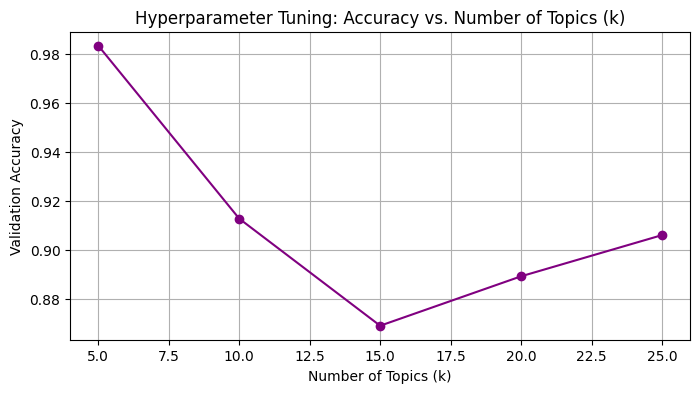

In [5]:
# plot and visualize
plt.figure(figsize=(8, 4))
plt.plot(results_df['k'], results_df['Validation Accuracy'], marker='o', linestyle='-', color='purple')
plt.title('Hyperparameter Tuning: Accuracy vs. Number of Topics (k)')
plt.xlabel('Number of Topics (k)')
plt.ylabel('Validation Accuracy')
plt.grid(True)
plt.show()

## Train the Best Unsupervised Model

In [6]:
# use the best k found
k_best = 20 
nmf_model = NMF(
    n_components=k_best, random_state=RANDOM_STATE, max_iter=1000, 
    init='nndsvda', solver='mu', beta_loss='kullback-leibler'
)

W_train_full = nmf_model.fit_transform(X_train)
W_val_full = nmf_model.transform(X_val)

print("--- pre-trained best unsupervised model ---")

--- pre-trained best unsupervised model ---


# Unsupervised VS. Supervised

## Data Efficiency Comparison
- will vary the size of the training data (labels) used: 10%, 20%, 50%, 100%
- for Supervised, trains on the subset.
- for Unsupervised, uses subset labels to map the topics we already found.

In [7]:
train_sizes = [0.1, 0.2, 0.5, 1.0]
results_log = []

for frac in train_sizes:
    n_samples = int(X_train.shape[0] * frac)    
    X_subset = X_train[:n_samples]
    y_subset = y_train[:n_samples]    
    W_subset = W_train_full[:n_samples]
    
    # model supervised
    clf = LogisticRegression(random_state=RANDOM_STATE, max_iter=1000)
    clf.fit(X_subset, y_subset)
    sup_preds = clf.predict(X_val)
    sup_acc = accuracy_score(y_val, sup_preds)
    
    # model unsupervised
    train_topics = np.argmax(W_subset, axis=1)
    cm = confusion_matrix(y_subset, train_topics)
    
    topic_mapping = np.zeros(k_best, dtype=int)
    
    present_topics = np.unique(train_topics)
    for t in present_topics:
        mask = (train_topics == t)
        labels_in_topic = y_subset[mask]
        if len(labels_in_topic) > 0:
            most_freq_label = np.bincount(labels_in_topic).argmax()
            topic_mapping[t] = most_freq_label

    # predict
    val_topics = np.argmax(W_val_full, axis=1)
    unsup_preds = topic_mapping[val_topics]
    unsup_acc = accuracy_score(y_val, unsup_preds)
    
    print(f"  Data Used: {int(frac*100)}% ({n_samples} docs) -> Sup Acc: {sup_acc:.4f} | Unsup Acc: {unsup_acc:.4f}")
    
    results_log.append({
        'Fraction': f"{int(frac*100)}%",
        'Supervised (LogReg)': sup_acc,
        'Unsupervised (NMF)': unsup_acc
    })

res_df = pd.DataFrame(results_log)
print("\n--- Comparison Summary Table ---")
print(res_df.to_markdown(index=False))

  Data Used: 10% (119 docs) -> Sup Acc: 0.7248 | Unsup Acc: 0.8624
  Data Used: 20% (238 docs) -> Sup Acc: 0.8758 | Unsup Acc: 0.8691
  Data Used: 50% (596 docs) -> Sup Acc: 0.9530 | Unsup Acc: 0.8826
  Data Used: 100% (1192 docs) -> Sup Acc: 0.9732 | Unsup Acc: 0.8893

--- Comparison Summary Table ---
| Fraction   |   Supervised (LogReg) |   Unsupervised (NMF) |
|:-----------|----------------------:|---------------------:|
| 10%        |              0.724832 |             0.862416 |
| 20%        |              0.875839 |             0.869128 |
| 50%        |              0.95302  |             0.88255  |
| 100%       |              0.973154 |             0.889262 |


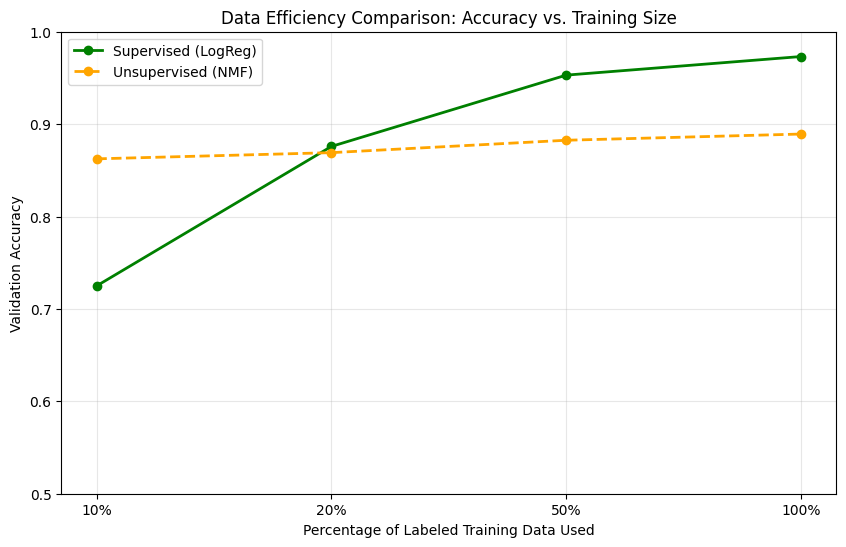

In [8]:
# plot
plt.figure(figsize=(10, 6))
plt.plot(res_df['Fraction'], res_df['Supervised (LogReg)'], marker='o', label='Supervised (LogReg)', color='green', linewidth=2)
plt.plot(res_df['Fraction'], res_df['Unsupervised (NMF)'], marker='o', label='Unsupervised (NMF)', color='orange', linewidth=2, linestyle='--')

plt.title('Data Efficiency Comparison: Accuracy vs. Training Size')
plt.xlabel('Percentage of Labeled Training Data Used')
plt.ylabel('Validation Accuracy')
plt.ylim(0.5, 1.0)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

## Accuracy

In [9]:
# train supervised (logistic regression) on the same X_train used for NMF
clf = LogisticRegression(random_state=RANDOM_STATE, max_iter=1000)
clf.fit(X_train, y_train)

# predict on the same X_val
sup_preds = clf.predict(X_val)
sup_acc = accuracy_score(y_val, sup_preds)

print(f"--- Supervised Baseline Accuracy is: {sup_acc:.4f} ---")

--- Supervised Baseline Accuracy is: 0.9732 ---


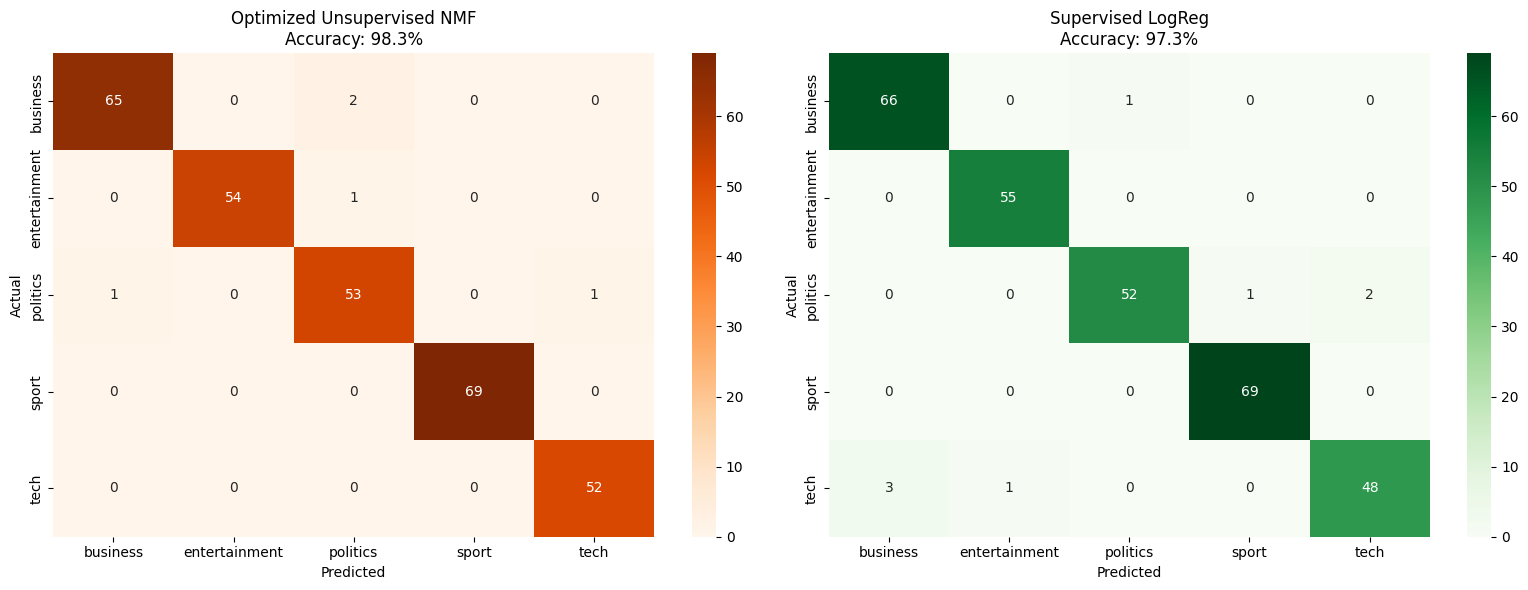

In [13]:
# plot and compare nmf vs logreg
le = LabelEncoder()
le.fit(train_df['Category'])
classes = le.classes_
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# plot unsupervised
cm_unsup = confusion_matrix(y_val, best_nmf_preds)
sns.heatmap(cm_unsup, annot=True, fmt='d', cmap='Oranges', ax=axes[0], 
            xticklabels=classes, yticklabels=classes)
axes[0].set_title(f'Optimized Unsupervised NMF\nAccuracy: {best_nmf_acc:.1%}')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

# plot supervised
cm_sup = confusion_matrix(y_val, sup_preds)
sns.heatmap(cm_sup, annot=True, fmt='d', cmap='Greens', ax=axes[1], 
            xticklabels=classes, yticklabels=classes)
axes[1].set_title(f'Supervised LogReg\nAccuracy: {sup_acc:.1%}')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()

In [14]:
comparison_df = pd.DataFrame({
    'Metric': ['Best Validation Accuracy', 'Approach', 'Input Data Requirements'],
    'Unsupervised (NMF)': [f"{best_nmf_acc:.4f}", 'Topic Discovery (KL-Divergence)', 'Raw Text Only'],
    'Supervised (LogReg)': [f"{sup_acc:.4f}", 'Class Boundary Optimization', 'Text + Labels']
})
print(comparison_df.to_markdown(index=False))

| Metric                   | Unsupervised (NMF)              | Supervised (LogReg)         |
|:-------------------------|:--------------------------------|:----------------------------|
| Best Validation Accuracy | 0.9832                          | 0.9732                      |
| Approach                 | Topic Discovery (KL-Divergence) | Class Boundary Optimization |
| Input Data Requirements  | Raw Text Only                   | Text + Labels               |
